<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM_Predict/blob/main/Challenge_predict_evasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> CHALLENGE TELECOM X:
**Análisis de evasión de clientes Parte-2**

## **MISIÓN**



Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **OBJETIVOS DEL DESAFÍO**



- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **DESARROLLO**

### **Cargar archivo**

In [37]:
import pandas as pd

# Cargar archivo CSV
df_final = pd.read_csv("/content/df_predict_churn_2.csv")

# Vista rápida de los primeros registros
df_final.head(5)

,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fibra Óptica,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fibra Óptica,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0,1.0


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

En este caso, como el objetivo es predecir si un cliente va a cancelar o no el servicio, estamos trabajando con una variable categórica (churn: sí o no). Por eso, los modelos adecuados son los de clasificación, como DecisionTreeClassifier o KNeighborsClassifier

In [39]:
df_final.sample(5)

,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
1546,2208-UGTGR,No,Male,0,No,No,56,Yes,Yes,Fibra Óptica,...,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,3.286667,0.0,0.0
466,0661-XEYAN,Yes,Female,1,No,No,1,No,No phone service,DSL,...,No,No,Month-to-month,Yes,Mailed check,25.80,25.80,0.860000,1.0,1.0
2770,3838-OZURD,Yes,Male,0,Yes,No,66,Yes,Yes,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.00,7133.25,3.500000,1.0,1.0
3763,5172-MIGPM,No,Male,0,No,No,4,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,65.55,237.20,2.185000,0.0,0.0
4029,5515-AKOAJ,Yes,Female,0,No,No,54,Yes,Yes,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.10,5440.90,3.336667,1.0,1.0


### <font color='blue'>**1.- Preparar los datos para el modelado (tratamiento, codificación, normalización)**.

##### **Tratamiento de valores nulos**

In [45]:
# Imputar con mediana en 'account.Charges.Total' — versión segura
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(df_final['account.Charges.Total'].median())

# Eliminar filas sin datos en la variable objetivo
df_final.dropna(subset=['Churn_bin', 'Churn_num'], inplace=True)

##### **Codificación de Variables Categórica**

In [41]:
# Eliminar columna de ID si no es predictiva
df_final.drop(columns=['ID_Cliente'], inplace=True)

# Codificación con pd.get_dummies
columnas_categoricas = df_final.select_dtypes(include='object').columns

df_final = pd.get_dummies(df_final, columns=columnas_categoricas, drop_first=True)

##### **Verificación final del DataFram**

In [42]:
# Confirmar que no quedan datos nulos ni columnas tipo object
print(df_final.isnull().sum())
print(df_final.dtypes)

customer.SeniorCitizen                           0
customer.tenure                                  0
Facturacion_Mensual                              0
account.Charges.Total                            0
Cuentas_Diarias                                  0
Churn_bin                                        0
Churn_num                                        0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fibra Óptica            0
internet.InternetService_Sin Servicio            0
internet.OnlineSecurity_No internet service      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_No internet service        0
internet.OnlineBackup_Yes      

### <font color='blue'>**2.- Realizar análisis de correlación y selección de variables**.

##### **Análisis de correlación numérica**

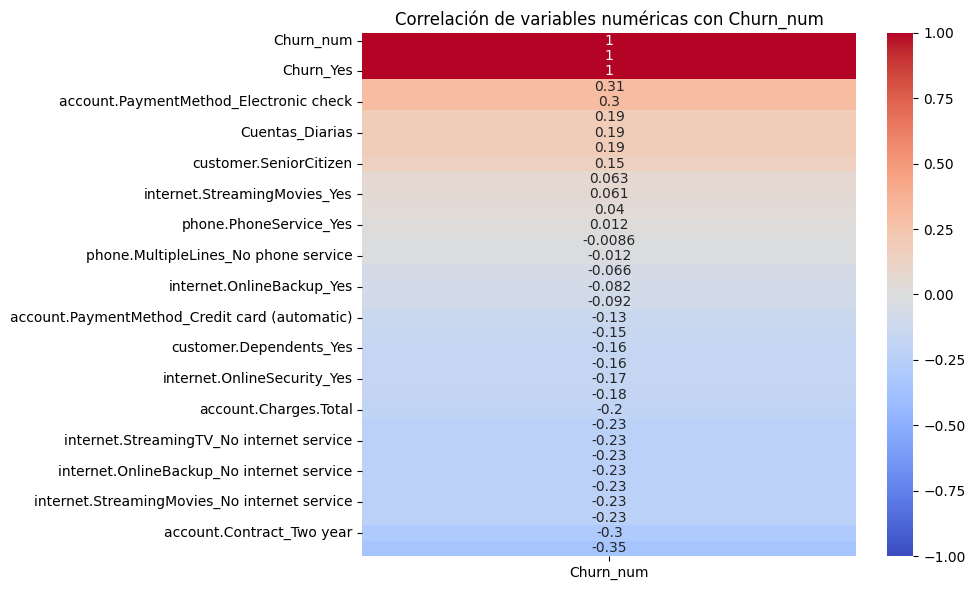

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación de variables numéricas
correlaciones = df_final.corr(numeric_only=True)

# Visualizar correlación con la variable objetivo
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones[['Churn_num']].sort_values(by='Churn_num', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de variables numéricas con Churn_num")
plt.tight_layout()
plt.show()

##### **Análisis de Importancia para Variables Booleana**

/tmp/ipython-input-1220061550.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


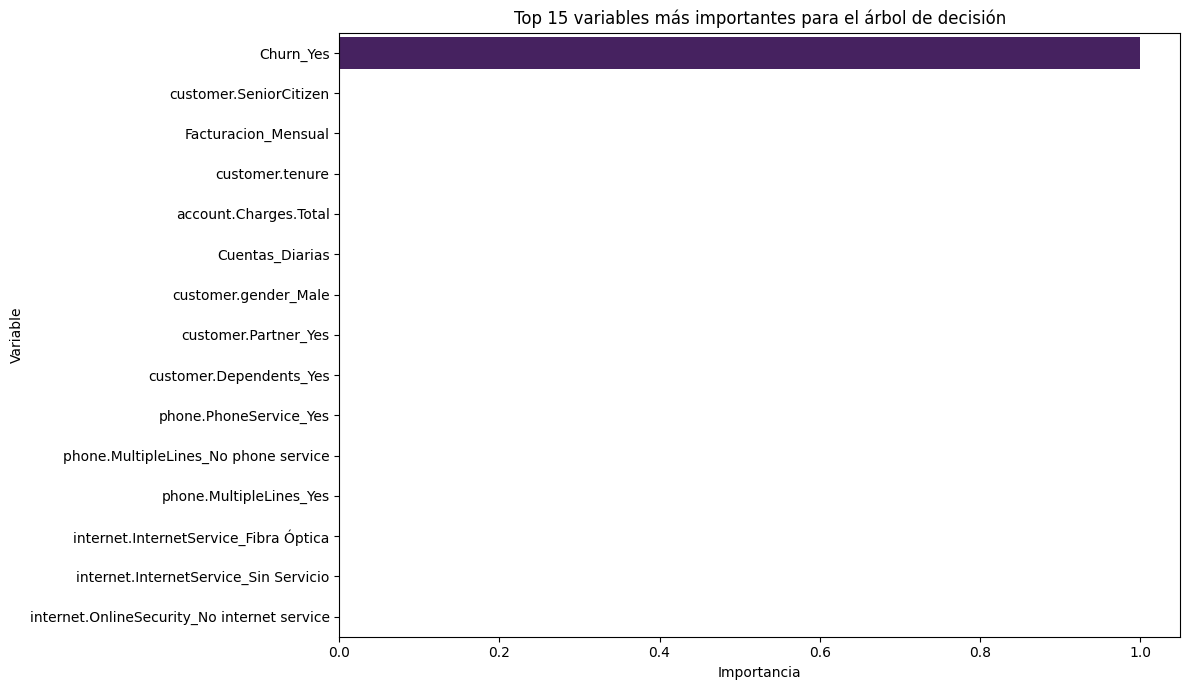

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Definimos variables predictoras y target
X = df_final.drop(columns=['Churn_bin', 'Churn_num'])
y = df_final['Churn_bin']  # o 'Churn_num' si preferimos continuo

# Entrenar modelo rápido para evaluar importancia
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

# Obtener importancias
importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualización
plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables más importantes para el árbol de decisión")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

/tmp/ipython-input-943410578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


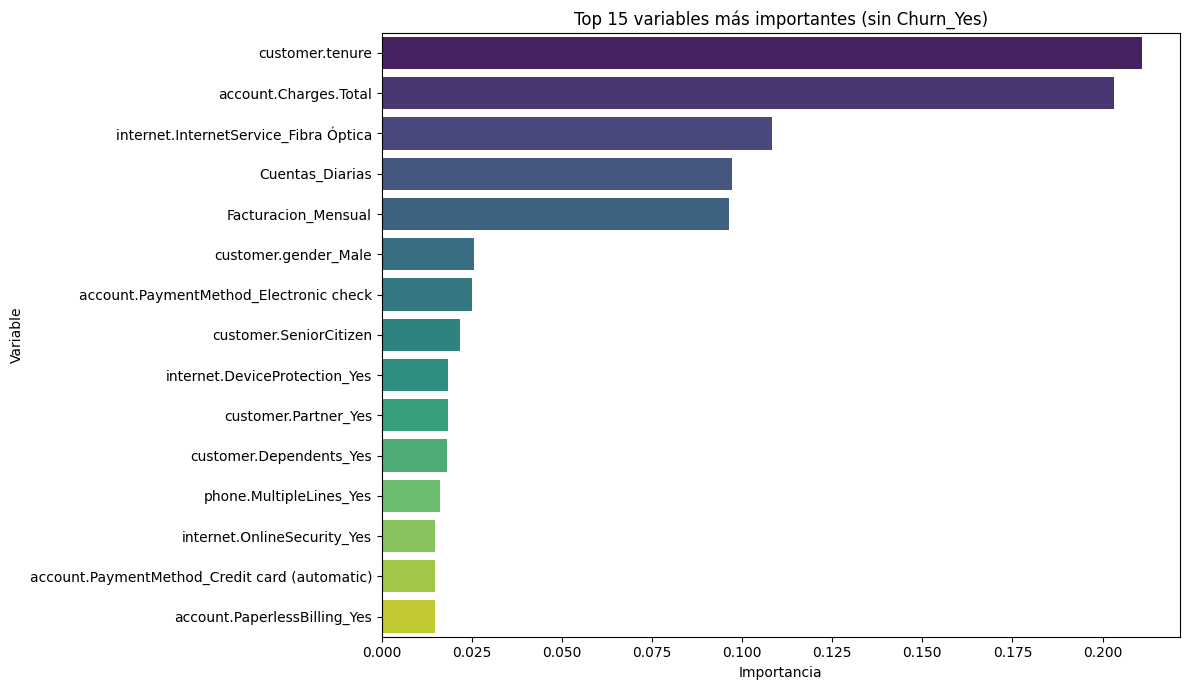

In [48]:
X = df_final.drop(columns=['Churn_bin', 'Churn_num', 'Churn_Yes'])  # excluimos el target y su duplicado
y = df_final['Churn_bin']  # o 'Churn_num' según tu criterio

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizamos nuevamente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables más importantes (sin Churn_Yes)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Variables Predictivas Seleccionadas para el Modelo **DecisionTreeClassifier**

| Variable                                  | Descripción y Justificación |
|--------------------------------------------|------------------------------|
| `customer.tenure`                          | Antigüedad del cliente; menor permanencia se asocia a mayor churn. |
| `account.Charges.Total`                    | Total facturado; refleja exposición financiera acumulada. |
| `internet.InternetService_Fibra Óptica`    | Este tipo de servicio está correlacionado con mayor abandono. |
| `Cuentas_Diarias`                          | Actividad operativa diaria; puede influir en la permanencia. |
| `Facturacion_Mensual`                      | Costo mensual del servicio; niveles altos pueden generar abandono. |
| `customer.SeniorCitizen`                   | Grupo demográfico con patrones de churn distintos. |
| `account.PaymentMethod_Electronic check`   | Método de pago vinculado a mayor volatilidad de permanencia. |
| `account.Contract_Two year`                | Contrato largo suele estar ligado a menor churn. |
| `internet.OnlineSecurity_Yes`              | Servicios adicionales pueden aumentar la percepción de valor. |
| `phone.MultipleLines_Yes`                  | Presencia de líneas múltiples podría asociarse a mayor complejidad o costos. |

### <font color='blue'>**3.- Entrenar dos o más modelos de clasificación**.